In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## read the data
data = pd.read_csv('/kaggle/input/52000-animation-movie-details-dataset-2024/Animation_Movies.csv')

In [3]:
## the shape of data
data.shape

(51945, 23)

it's show we have 51.945 rows and 23 columns in our data

In [4]:
## check column name
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'adult', 'backdrop_path', 'budget', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'tagline', 'genres',
       'production_companies', 'production_countries', 'spoken_languages'],
      dtype='object')

In [5]:
## look at the first five rows of data
## i use set_option function from pandas, and set total column to display 23 column
pd.set_option('display.max_columns', 23)
data.head()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages
0,150540,Inside Out,7.922,19463,Released,2015-06-09,857611174,95,False,/j29ekbcLpBvxnGk6LjdTc2EI5SA.jpg,175000000,http://movies.disney.com/inside-out,tt2096673,en,Inside Out,"Growing up can be a bumpy road, and it's no ex...",107.292,/2H1TmgdfNtsKlU9jKdeNyYL5y8T.jpg,Meet the little voices inside your head.,"Animation, Family, Adventure, Drama, Comedy","Pixar, Walt Disney Pictures",United States of America,English
1,14160,Up,7.949,18857,Released,2009-05-28,735099082,96,False,/hGGC9gKo7CFE3fW07RA587e5kol.jpg,175000000,http://disney.go.com/disneypictures/up/,tt1049413,en,Up,Carl Fredricksen spent his entire life dreamin...,90.968,/vpbaStTMt8qqXaEgnOR2EE4DNJk.jpg,The greatest adventure is just getting back home.,"Animation, Comedy, Family, Adventure",Pixar,United States of America,English
2,12,Finding Nemo,7.824,18061,Released,2003-05-30,940335536,100,False,/h3uqFk7sZRJvLZDdLiFB9qwbL07.jpg,94000000,http://movies.disney.com/finding-nemo,tt0266543,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",55.456,/ggQ6o8X5984OCh3kZi2UIJQJY5y.jpg,There are 3.7 trillion fish in the ocean. They...,"Animation, Family",Pixar,United States of America,English
3,354912,Coco,8.222,17742,Released,2017-10-27,800526015,105,False,/askg3SMvhqEl4OL52YuvdtY40Yb.jpg,175000000,https://www.pixar.com/feature-films/coco,tt2380307,en,Coco,Despite his family’s baffling generations-old ...,166.578,/gGEsBPAijhVUFoiNpgZXqRVWJt2.jpg,The celebration of a lifetime,"Family, Animation, Fantasy, Music, Comedy, Adv...","Pixar, Walt Disney Pictures",United States of America,"English, Spanish"
4,10681,WALL·E,8.078,17446,Released,2008-06-22,521311860,98,False,/fK5ssgvtI43z19FoWigdlqgpLRE.jpg,180000000,https://www.pixar.com/feature-films/walle/,tt0910970,en,WALL·E,What if mankind had to leave Earth and somebod...,58.517,/hbhFnRzzg6ZDmm8YAmxBnQpQIPh.jpg,After 700 years of doing what he was built for...,"Animation, Family, Science Fiction","Pixar, Walt Disney Pictures",United States of America,English


In [6]:
## check data type and non null values for each column in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51945 entries, 0 to 51944
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    51945 non-null  int64  
 1   title                 51944 non-null  object 
 2   vote_average          51945 non-null  float64
 3   vote_count            51945 non-null  int64  
 4   status                51945 non-null  object 
 5   release_date          49808 non-null  object 
 6   revenue               51945 non-null  int64  
 7   runtime               51945 non-null  int64  
 8   adult                 51945 non-null  bool   
 9   backdrop_path         15835 non-null  object 
 10  budget                51945 non-null  int64  
 11  homepage              8253 non-null   object 
 12  imdb_id               29552 non-null  object 
 13  original_language     51945 non-null  object 
 14  original_title        51944 non-null  object 
 15  overview           

The output above displays information about how many values are not missing and the data type for each column. some columns have missing values and the release_date column will convert its data type to datetime

In [7]:
## check missing values
data.isnull().sum().sort_values(ascending=False)

tagline                 47267
homepage                43692
backdrop_path           36110
production_companies    22547
imdb_id                 22393
spoken_languages        18127
poster_path             14011
production_countries    12245
overview                 6079
release_date             2137
original_title              1
title                       1
popularity                  0
vote_average                0
genres                      0
vote_count                  0
revenue                     0
runtime                     0
original_language           0
status                      0
budget                      0
adult                       0
id                          0
dtype: int64

it's showing the total of missing values for each column in descending order, 12 columns have missing values from 23 total columns.

In [8]:
## check the duplicate value in the data
data.duplicated().sum()

0

In [9]:
## descriptive statistic for data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,51945.0,6.188122e+05,3.479748e+05,12.0,330081.0,611915.0,915904.000,1.238314e+06
vote_average,51945.0,2.597083e+00,3.318748e+00,0.0,0.0,0.0,6.000,1.000000e+01
vote_count,51945.0,4.039538e+01,4.827059e+02,0.0,0.0,0.0,2.000,1.946300e+04
revenue,51945.0,1.863464e+06,3.049824e+07,0.0,0.0,0.0,0.000,1.450027e+09
runtime,51945.0,2.090141e+01,3.901600e+01,0.0,3.0,7.0,19.000,3.720000e+03
budget,51945.0,5.759513e+05,7.606628e+06,0.0,0.0,0.0,0.000,2.600000e+08
popularity,51945.0,1.886233e+00,9.700913e+00,0.0,0.6,0.6,0.882,1.008942e+03


In [11]:
## convert release_date column to datetime data type
data['release_date'] = pd.to_datetime(data['release_date'], format='%Y-%m-%d')

## Questions for Analyzing Animated Movies:

**1. What animated movie has the longest runtime?** <br>
**2. What is the correlation between revenue and budget?** <br>
**3. Are all animated movie for children ?** <br>
**4. What is the correlation between revenue and runtime?** <br>
**5. Which year had the most animated movie releases?** <br>
**6. Which animated movie is the most popular?** <br>
**7. Which animated genre is produced the most?** <br>
**8. Which country is the driving force behind global animation?** <br>
**9. What language is used the most in animated film production?**
**10. Do all animated films make a profit?**

## **1. What animated movie has the longest runtime?** 

In [12]:
count_runtime = data.sort_values(by='runtime', ascending=False).head(10)[['title','runtime']]
count_runtime

,title,runtime
20296,Giant 600 Cartoon Collection,3720
38214,200 Family Cartoons Collection Vol. 1,1335
43438,150 Cartoon Classics,1035
16130,The New Adventures of Winnie the Pooh,999
23201,The Scooby-Doo Show,960
23253,The New Scooby-Doo Movies,960
32340,Metalocalypse (2006-2012),740
26837,Legend of the Yôkai: The Cat-Eyed Boy,720
31440,Cocorico,676
14079,Miss Spider's Sunny Patch Kids,666


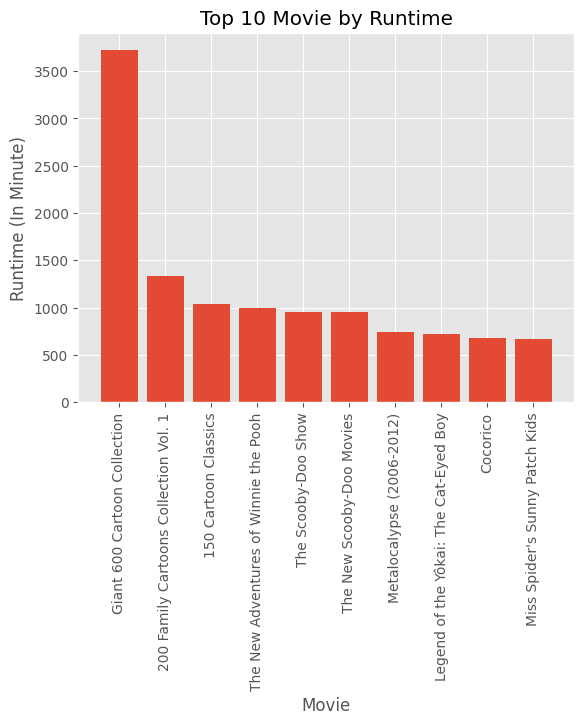

In [13]:
plt.style.use('ggplot') 
plt.bar(count_runtime['title'], count_runtime['runtime'])
plt.title('Top 10 Movie by Runtime')
plt.xlabel('Movie')
plt.ylabel('Runtime (In Minute)')
plt.xticks(rotation=90)
plt.show()

On the chart bar above is shown an animated movie based on runtime, on the top three positions are Giant 600 Cartoon Collection, 200 Family Cartoons Collection Vol. 1, and 150 Cartoon Clasics. which is a collection of several cartoons from various studios and eras such as popeye, bety boop, woody woodpecker and others.

 ## **2. What is the correlation between revenue and budget?**

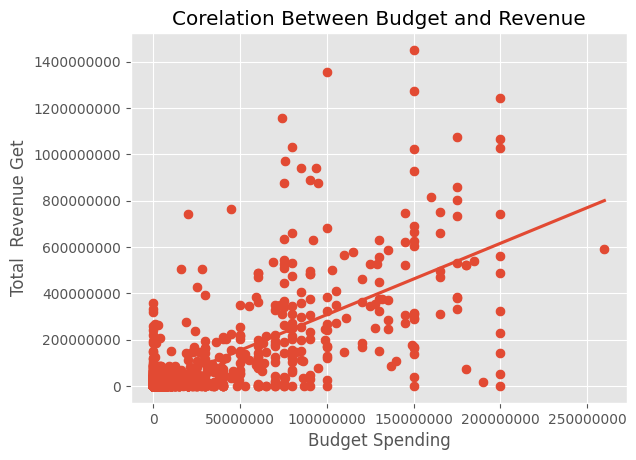

In [14]:
plt.scatter(data['budget'], data['revenue'])
sns.regplot(x='budget', y='revenue',data=data, ci=None)
plt.ticklabel_format(style='plain')
plt.xlabel('Budget Spending')
plt.ylabel('Total  Revenue Get')
plt.title('Corelation Between Budget and Revenue')
plt.show()

in the scatter plot, the plot points tend to increase from left to right, this shows that there is a positive relationship between budget and reviews, meaning that the bigger the budget, the bigger the revenue. There are also several outliers that can be observed in the scatter plot, where there are films with high budgets but generating little revenue

In [22]:
## top 10 animated movies with  the largest budget
largest_budget = data.loc[data['budget'].nlargest(10).index, ['title', 'budget']]
largest_budget

,title,budget
29,Tangled,260000000
17,Toy Story 3,200000000
23,Incredibles 2,200000000
26,Finding Dory,200000000
35,Monsters University,200000000
52,Luca,200000000
59,Cars 2,200000000
86,Onward,200000000
127,A Christmas Carol,200000000
167,Lightyear,200000000


## **3. Are all animated movie for children ?**

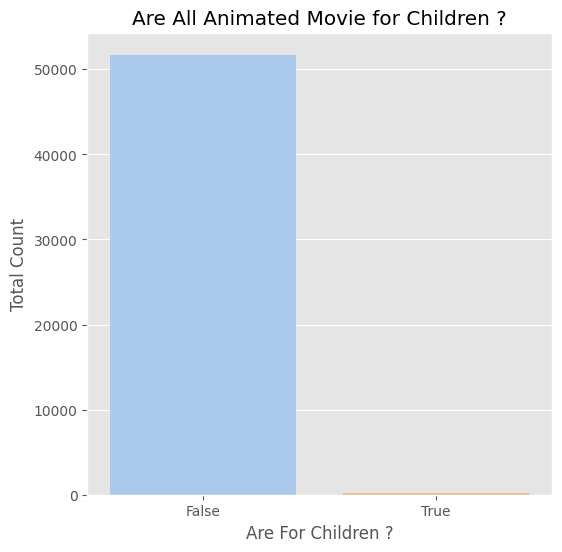

In [29]:
plt.figure(figsize=(6,6))
sns.countplot(x=data['adult'], palette='pastel')
plt.title('Are All Animated Movie for Children ?')
plt.xlabel('Are For Children ?')
plt.ylabel('Total Count')
plt.show()

Around 90% of the animation is made for children, and the remainder is not for children.

In [54]:
## check total count for False and True
data['adult'].value_counts()

adult
False    51719
True       226
Name: count, dtype: int64

In [60]:
## first five row of animated movies for children
data.loc[data['adult'] == False, 'title'].head()

0      Inside Out
1              Up
2    Finding Nemo
3            Coco
4          WALL·E
Name: title, dtype: object

In [59]:
## first five row of animated movies not for children
data.loc[data['adult'] == True, 'title'].head()

3318             Eveready Harton in Buried Treasure
5327                               Once Upon a Girl
6547                         Barbie Can Also Be Sad
6989    Butterscotch - The Perfume of the Invisible
8239                                       Aki-Sora
Name: title, dtype: object

 ## **4. What is the correlation between revenue and runtime?**

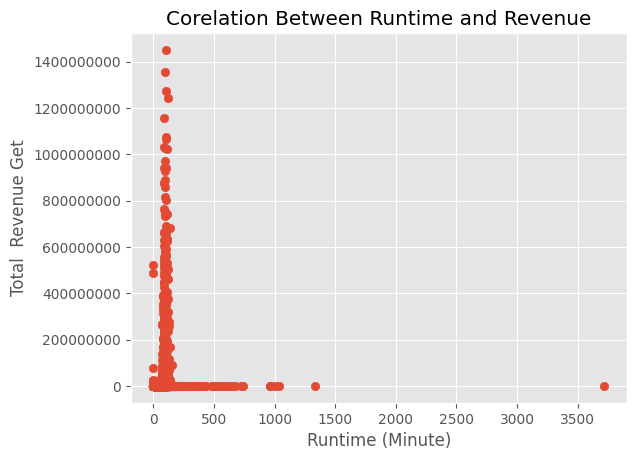

In [68]:
plt.scatter(data['runtime'], data['revenue'])
plt.ticklabel_format(style='plain')
plt.xlabel('Runtime (Minute)')
plt.ylabel('Total  Revenue Get')
plt.title('Corelation Between Runtime and Revenue')
plt.show()

There is no relationship between Runtime and Revenue

## **5. Which year had the most animated movie releases?**

In [5]:
print(f"Range in year column is from {int(data['Year'].min())} to {int(data['Year'].max())}")

Range in year column is from 1878 to 2026


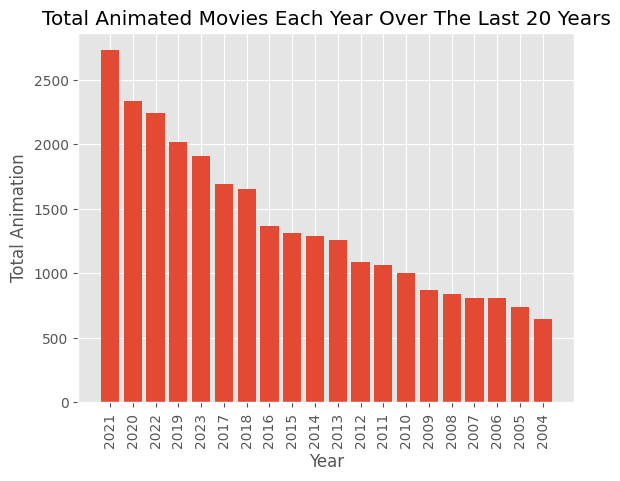

In [23]:
x = data['release_date'].dt.year.dropna().astype(int).astype(str).value_counts().sort_values(ascending=False).head(20).index
y = data['release_date'].dt.year.dropna().value_counts().sort_values(ascending=False).head(20)
plt.bar(x,y)
plt.title('Total Animated Movies Each Year Over The Last 20 Years')
plt.xlabel('Year')
plt.ylabel('Total Animation')
plt.xticks(rotation=90)
plt.show()

Animated films produced over the last 20 years have seen an increase every year. with the highest increase in 2021, followed by 2020, 2022, 2019

## **6. Which animated movie is the most popular?**

In [207]:
data.loc[data['popularity'].sort_values(ascending=False).head(10).index, ['title', 'popularity', 'production_countries']]

,title,popularity,production_countries
195,Elemental,1008.942,United States of America
1046,Carl's Date,819.429,United States of America
121,Spider-Man: Across the Spider-Verse,512.336,United States of America
491,Teenage Mutant Ninja Turtles: Mutant Mayhem,484.876,"Canada, France, United States of America"
4423,"Scooby-Doo! And Krypto, Too!",411.090,United States of America
67,The Super Mario Bros. Movie,410.411,"Japan, United States of America"
483,"Ruby Gillman, Teenage Kraken",321.777,United States of America
2704,Epic Tails,304.930,France
455,One Piece Film Red,293.869,Japan
474,Resident Evil: Death Island,264.731,Japan


Most of the popular films come from the United States

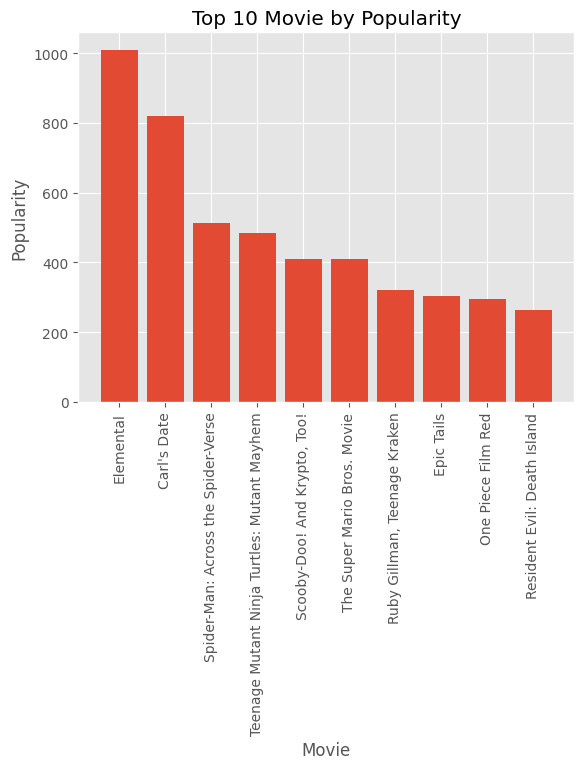

In [213]:
plt.bar(data.sort_values(by='popularity', ascending=False).head(10)['title'],data.sort_values(by='popularity', ascending=False).head(10)['popularity'])
plt.xlabel('Movie')
plt.ylabel('Popularity')
plt.title('Top 10 Movie by Popularity')
plt.xticks(rotation=90)
plt.show()

elemental is most popular among all the animated movie in the dataset

## **7. Which animated genre is produced the most?**

In [26]:
## check the values of genre
data['genres']

0              Animation, Family, Adventure, Drama, Comedy
1                     Animation, Comedy, Family, Adventure
2                                        Animation, Family
3        Family, Animation, Fantasy, Music, Comedy, Adv...
4                       Animation, Family, Science Fiction
                               ...                        
51940                                            Animation
51941                           Family, Animation, Fantasy
51942                   Animation, Action, Science Fiction
51943                       Animation, Documentary, Family
51944                                            Animation
Name: genres, Length: 51945, dtype: object

As we can see for each movie, it can be categorized into several genres. I will use Counter() from the collection to count the total occurrence of genres in each row of the genres column.

In [36]:
## Make a function to split each genre in rows by ",", remove whitespace from genres and count the total occurrence of genres.
from collections import Counter
def clean_and_count_genres(genres):
    return Counter(genre.strip() for genre in genres.split(','))

In [43]:
## make a new column called genre_counts and using .apply to apply function above for those columns
data['genre_counts'] = data['genres'].apply(clean_and_count_genres)

In [72]:
## total produced animation based on genre
data['genre_counts'].sum()

Counter({'Animation': 51954,
         'Comedy': 7879,
         'Family': 7480,
         'Fantasy': 3896,
         'Adventure': 3539,
         'Drama': 2849,
         'Science Fiction': 2540,
         'Action': 2428,
         'Documentary': 1897,
         'Music': 1697,
         'Horror': 1393,
         'Romance': 866,
         'TV Movie': 679,
         'Mystery': 543,
         'History': 499,
         'War': 368,
         'Crime': 320,
         'Thriller': 306,
         'Western': 161})

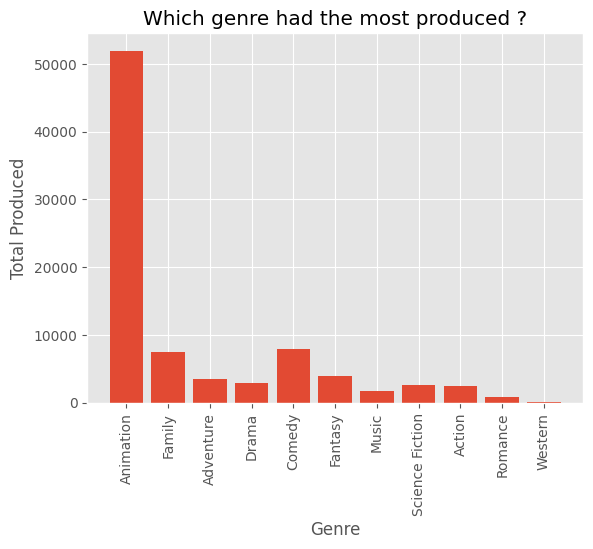

In [77]:
x = list(data['genre_counts'].sum().keys())[:11]
y = list(data['genre_counts'].sum().values())[:11]
plt.bar(x,y)
plt.title('Which genre had the most produced ?')
plt.xlabel('Genre')
plt.ylabel('Total Produced')
plt.xticks(rotation=90)
plt.show()

## **8. Which country is the driving force behind global animation?**

In [82]:
data['production_countries'].value_counts().head(10)

production_countries
United States of America    12836
Japan                        5182
France                       2136
United Kingdom               1854
Canada                       1616
Soviet Union                 1556
Germany                       980
Russia                        828
Poland                        711
China                         628
Name: count, dtype: int64

The chart shows that the country that produces the most animated films is the United States, and Japan is in second place.

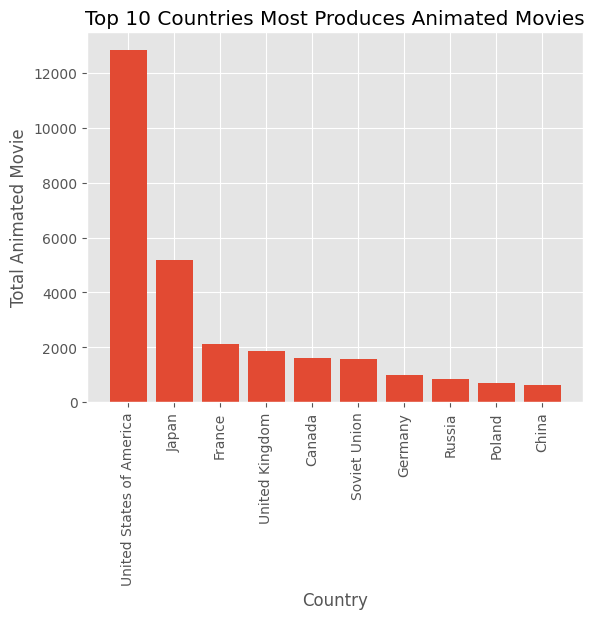

In [86]:
plt.bar(data['production_countries'].value_counts().head(10).index, data['production_countries'].value_counts().head(10))
plt.title('Top 10 Countries Most Produces Animated Movies')
plt.xlabel('Country')
plt.ylabel('Total Animated Movie')
plt.xticks(rotation = 90)
plt.show()

## **9. What language is used the most in animated film production?**

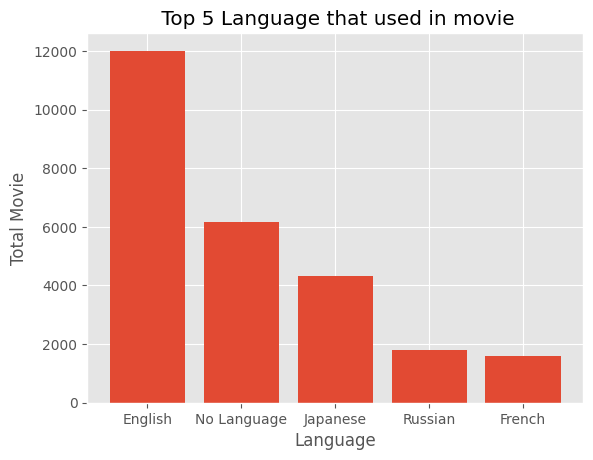

In [88]:
plt.bar(data['spoken_languages'].value_counts().head(5).index, data['spoken_languages'].value_counts().head(5).values)
plt.title(' Top 5 Language that used in movie')
plt.xlabel('Language')
plt.ylabel('Total Movie')
plt.show()

chart shows English is the most widely used language on movie with a total of 12,000 English-language movies, not expected that silent movie/no languange occupies the 2nd position with the total silent movie being 6000 movies

## **10. Do all animated films make a profit?**

In [109]:
## Whether the cost spent on film production is proportional to the profits earned ?
## make a copy from data called data
data1 = data[['revenue', 'budget', 'title']].copy()

In [112]:
data1['profit_loss'] = data['revenue'] - data['budget']
data1['result'] = 'Positive'
data1.loc[data1['profit_loss'] < 0, 'result'] = 'Negative'

In [113]:
## check result for each movie
## Positive --> Profit
## Negative --> Loss
data1['result'].value_counts()

result
Positive    50817
Negative     1128
Name: count, dtype: int64

In [111]:
# see which movie have a negative profit
data1.loc[data1['result'] == 'Negative', ['title','budget', 'revenue', 'profit_loss']].sort_values(by='profit_loss')

,title,budget,revenue,profit_loss
32258,Wish,200000000,0,-200000000
119,Turning Red,190000000,18879922,-171120078
52,Luca,200000000,49750471,-150249529
915,Pokémon the Movie: Hoopa and the Clash of Ages,150000000,0,-150000000
503,Mars Needs Moms,150000000,38992758,-111007242
...,...,...,...,...
49043,Magnificent Kaaboom!!! (Original),1,0,-1
31023,der golem,1,0,-1
21752,Bizarre Webcomic's Max Aventura,1,0,-1
19558,Sentimento,1,0,-1


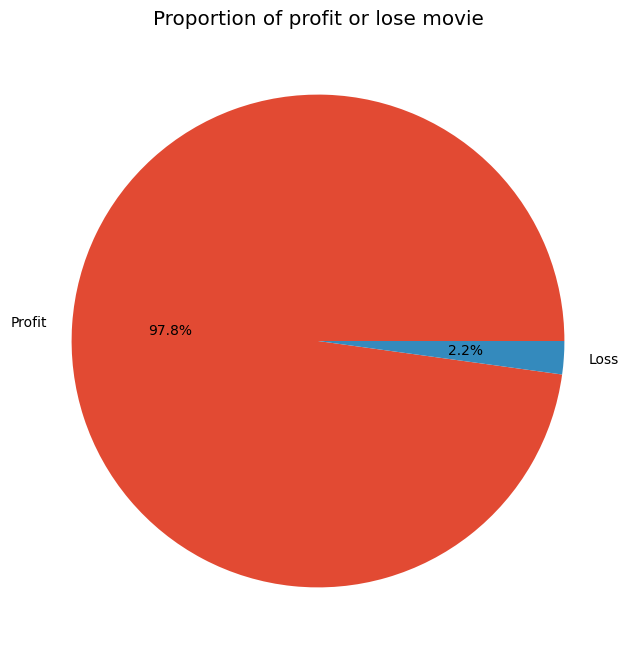

In [114]:
## create pie chart for better understanding 
plt.figure(figsize=(10,8))
plt.pie(data1['result'].value_counts(), labels = ['Profit', 'Loss'], autopct='%1.1f%%')
plt.title('Proportion of profit or lose movie')
plt.show()

The pie chart showed that 97.8% of the films made a profit and the remaining 2.2% made a loss.